# Jupter, Pyplot and Numpy Problem Sheet
This is a jupyter notebook of 10 exercises based on pyplot and numpy I need to complete for the Emerging Technologies module I am taking in my course this semester

# Exercise 1 - Get & load data

In [10]:
import numpy as np

filename = 'Iris.csv'
seLength, seWidth, ptLength, ptWidth = np.genfromtxt('Iris.csv', delimiter=',', usecols=(0,1,2,3), unpack=True, dtype=float)
species = np.genfromtxt('Iris.csv', delimiter=',', usecols=(4), unpack=True, dtype=str)

        
for i in range(100):
    print('{0:.1f} {1:.1f} {2:.1f} {3:.1f} {4:s}'.format(seLength[i], seWidth[i], ptLength[i], ptWidth[i], species[i]))

5.1 3.5 1.4 0.2 Iris-setosa
4.9 3.0 1.4 0.2 Iris-setosa
4.7 3.2 1.3 0.2 Iris-setosa
4.6 3.1 1.5 0.2 Iris-setosa
5.0 3.6 1.4 0.2 Iris-setosa
5.4 3.9 1.7 0.4 Iris-setosa
4.6 3.4 1.4 0.3 Iris-setosa
5.0 3.4 1.5 0.2 Iris-setosa
4.4 2.9 1.4 0.2 Iris-setosa
4.9 3.1 1.5 0.1 Iris-setosa
5.4 3.7 1.5 0.2 Iris-setosa
4.8 3.4 1.6 0.2 Iris-setosa
4.8 3.0 1.4 0.1 Iris-setosa
4.3 3.0 1.1 0.1 Iris-setosa
5.8 4.0 1.2 0.2 Iris-setosa
5.7 4.4 1.5 0.4 Iris-setosa
5.4 3.9 1.3 0.4 Iris-setosa
5.1 3.5 1.4 0.3 Iris-setosa
5.7 3.8 1.7 0.3 Iris-setosa
5.1 3.8 1.5 0.3 Iris-setosa
5.4 3.4 1.7 0.2 Iris-setosa
5.1 3.7 1.5 0.4 Iris-setosa
4.6 3.6 1.0 0.2 Iris-setosa
5.1 3.3 1.7 0.5 Iris-setosa
4.8 3.4 1.9 0.2 Iris-setosa
5.0 3.0 1.6 0.2 Iris-setosa
5.0 3.4 1.6 0.4 Iris-setosa
5.2 3.5 1.5 0.2 Iris-setosa
5.2 3.4 1.4 0.2 Iris-setosa
4.7 3.2 1.6 0.2 Iris-setosa
4.8 3.1 1.6 0.2 Iris-setosa
5.4 3.4 1.5 0.4 Iris-setosa
5.2 4.1 1.5 0.1 Iris-setosa
5.5 4.2 1.4 0.2 Iris-setosa
4.9 3.1 1.5 0.1 Iris-setosa
5.0 3.2 1.2 0.2 Iris

# Exercise 2 - Write a note about the data set

The Iris data set was founded by Ronald Fisher, a British man who was a statistican and biologist. It was introduced in a paper he wrote in 1936 called "The use of multiple measurements in taxonomic problems". The data set is made up of 50 samples from the 3 spicies of Iris and there is four features for each sample. The data set is used to aid in machine learning in areas such as support vector machines.

# Exercise 3 - Create a simple plot

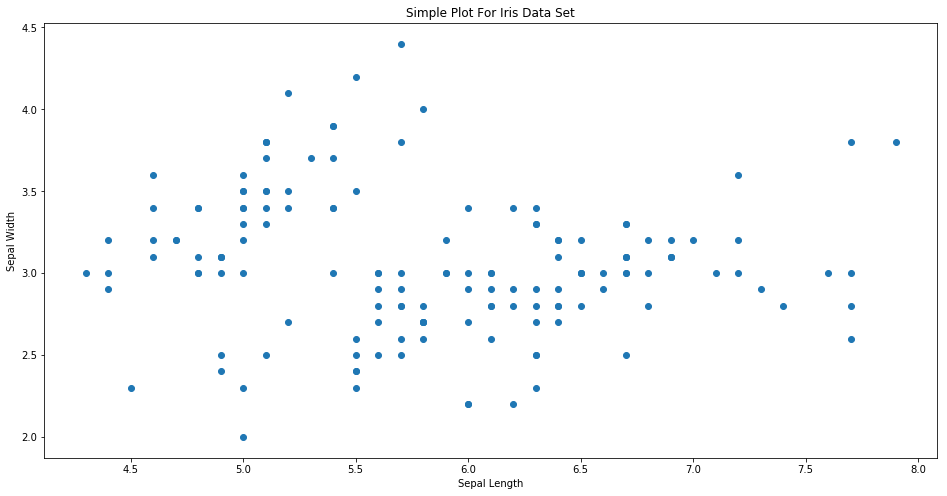

In [11]:
import matplotlib.pyplot as pl

x, y = seLength, seWidth

pl.rcParams['figure.figsize'] = (16,8)
pl.title('Simple Plot For Iris Data Set')
pl.xlabel('Sepal Length')
pl.ylabel('Sepal Width')
pl.scatter(x,y)
pl.show()

# Exercise 4 - Create a more complex plot

# Exercise 5 - Use seaborn

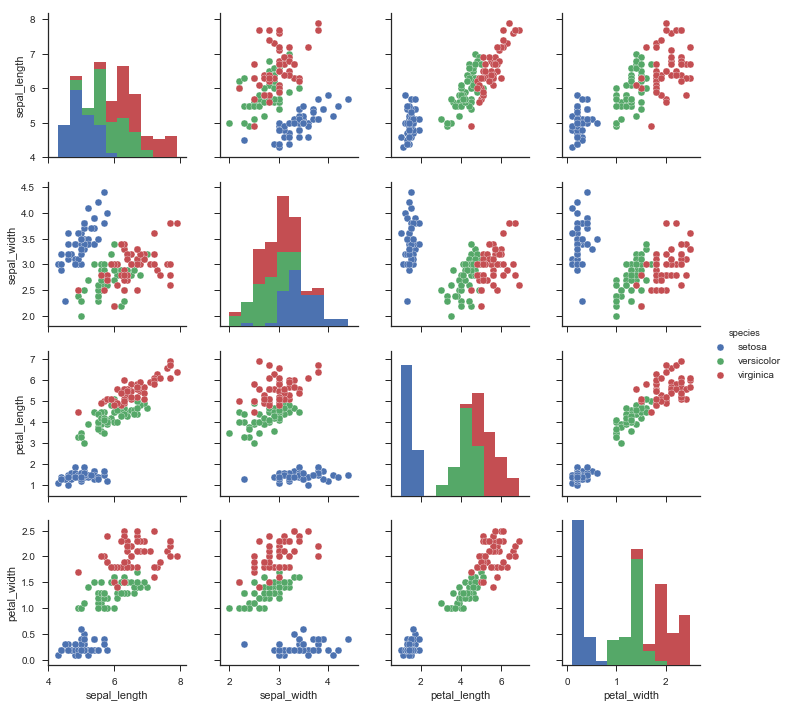

In [14]:
# Adapted from
# https://stackoverflow.com/questions/26597116/seaborn-plots-not-showing-up

import seaborn as sea
sea.set(style="ticks")

sea.plt.rcParams['figure.figsize'] = (16,8)
df = sea.load_dataset("iris")
sea.pairplot(df, hue="species")
sea.plt.show()

# Exercise 6 - Fit a line

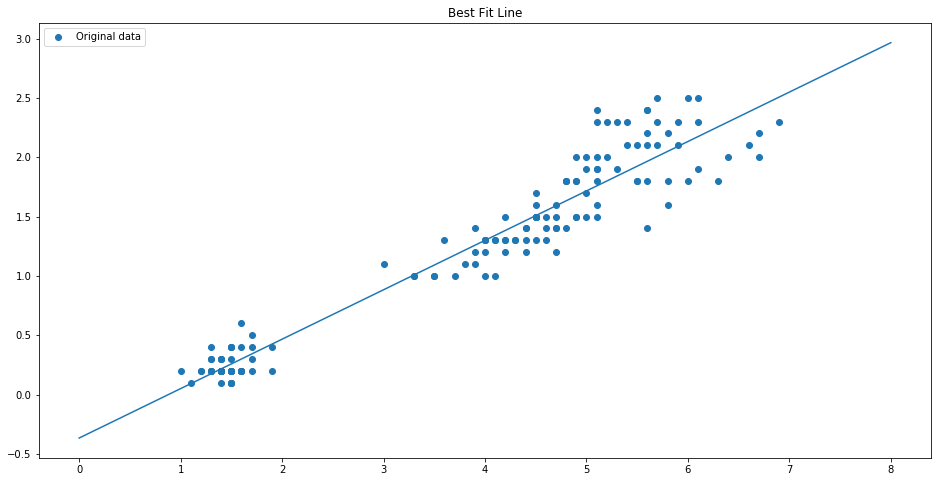

In [21]:
w, d = np.array(ptLength), np.array(ptWidth)

pl.rcParams['figure.figsize'] = (16,8)
pl.title('Best Fit Line')

i = np.linspace(0,8,1000)
pl.scatter(w, d, label='Original data')
v = np.polyfit(w,d,1)
line = v[0]*i+v[1]
pl.plot(i,line)

pl.legend()
pl.show()

# Exercise 7 - Calculate the R-squared value

# Exercise 8 - Fit another line

# Exercise 9 - Calculate the R-squared value

# Exercise 10 -  Use gradient descent